# BME-230B Spring 2019 HW 2 Question 1
James Casaletto, Andrew Davidson, Yuanqing Xue, Jim Zheng

<B>Question 1.a, 1.b see </B>[euclid_knn.py](euclid_knn.py)

ref: 
- [ Single-Cell Analysis in Python](https://scanpy.readthedocs.io/en/stable/api/index.html#tools-tl)
- [data exploration](exploreData.ipynb)
- [scanpy.tl.umap](https://icb-scanpy.readthedocs-hosted.com/en/stable/api/scanpy.tl.umap.html)
- [scanpy.pl.umap](https://icb-scanpy.readthedocs-hosted.com/en/stable/api/scanpy.pl.umap.html#scanpy.pl.umap)


In [1]:
from euclid_knn import KnnG
import matplotlib.pyplot as plt
import numpy as np
import scanpy.api as sc
import scanpy

In [3]:
anndata = sc.read("PBMC.merged.h5ad")

In [4]:
%%time
# run PCA, compute pairwise distance, k-nearest-neighbors 
# trick to replacing scanpy implementation with our own is to 
# update the anndata object with our intermediate values
# 
# we replace the scanpy version of PCA by updating
# .adata.obsm['X_pca'] = our PCA() output
#
# we replace the scanpy version of k-nearest-neighbors by updating
# self.adata.uns['neighbors']['connectivities'] = our knn() output
# self.adata.uns['neighbors']['distances'] = out knn() output

knng = KnnG(anndata, n_neighbors=12, runPCA=True, nPC=50)

CPU times: user 4min 11s, sys: 3.47 s, total: 4min 15s
Wall time: 4min 23s


In [5]:
%%time
# umap() reduce results to 2 deminsions so that we can plot the data
sc.tl.umap(anndata)

CPU times: user 16.9 s, sys: 165 ms, total: 17 s
Wall time: 15.7 s


### 1.c. [5 pts] Turn in a UMAP plot of your 12-NN graph calculated from the combined chemistry PBMC dataset colored by batch (the chemistry used)

<Figure size 720x720 with 0 Axes>

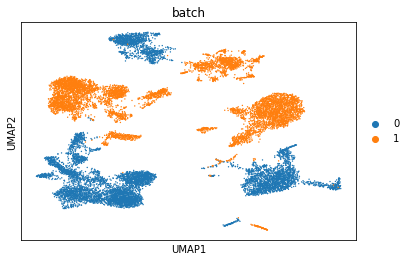

In [8]:
# color can be any thing in obs
plt.figure(figsize=(10,10))
scanpy.pl.umap(anndata, color=['batch'])

### 1.d. [5 pts] Turn in another UMAP plot of your 12-NN graph calculated from the combined chemistry PBMC dataset but colored by cell type

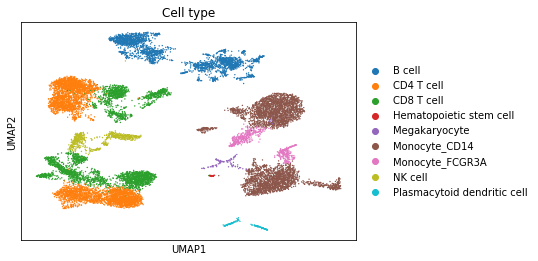

In [9]:
scanpy.pl.umap(anndata, color=['Cell type'])